## Product Sales Analysis

The distribution of products sold was examined and a surprisingly large spread of sales revenue across the product range was identified. The vast majority of sales revenue is generated from products in the £20 to $4,500 price range, whereas the high-end and low-end products do not generate as significant a sales revenue.

***Product Sales Revenue***

The entire product range totals 6,110 items and generated a sales revenue of approximately $4,000k. Within this, 100 products generated $1,600k, or 40%, of the sales revenue. And over 2,000 products generated less than $150k sales revenue.

***Product Pricing***

Approximately $2,000k, 50% of sales revenue, is generated by the 200 highest priced products (all over $500 each); the majority of which is from products in the $1,500 to $4,500 price range. The majority of products (over 3,500) are in the $20 to $100 price range and generate approximately $1,250k sales revenue. The very lowest priced products, 1,200 items under $20, generate very little sales revenue.


In [2]:
# Retrieve the completed working dataframes for analysis
%store -r sales_df stock_df customer_reviews_df customers_df states_df

Sales with no sale price: 95


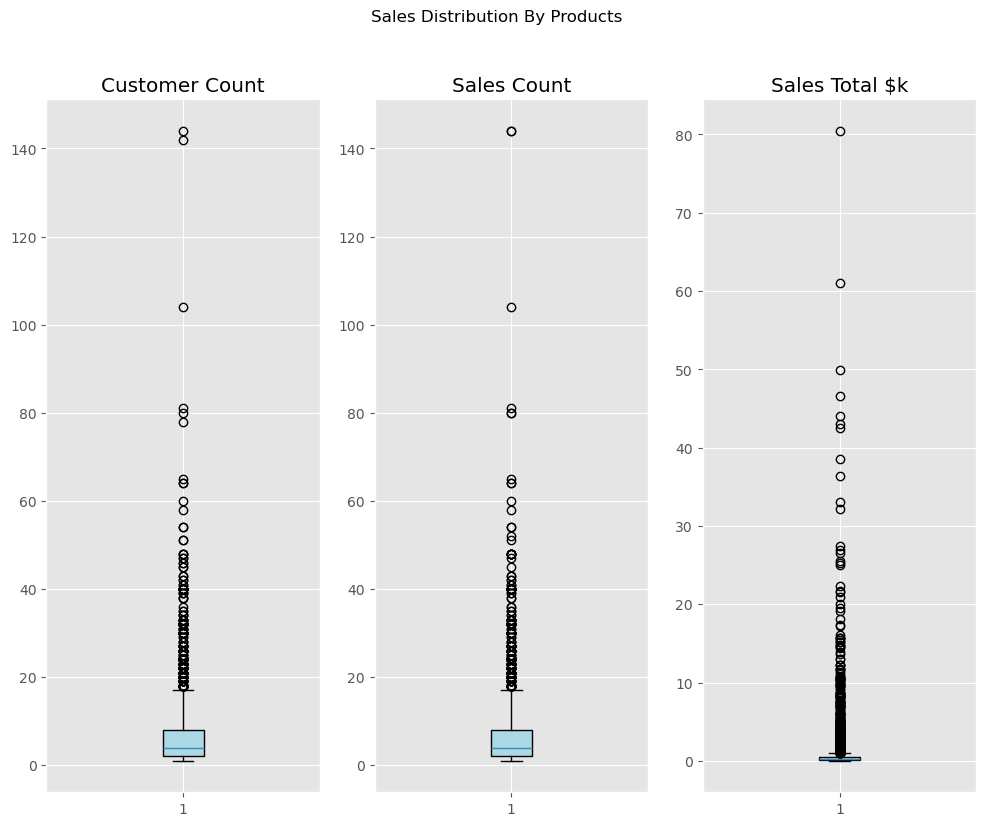

Top Five Products by Sales Value


,stock_name,sales_price,uniq_cust_count,sales_count,sales_total$k
36354,"GE Profile™ 30"" Built-In Double Wall Oven Self...",4023.510,20,20,80.4702
19259,LG ENERGY STAR® 30 cu. ft. Super Capacity 3-Do...,4356.100,14,14,60.9854
35750,Samsung ENERGY STAR® 26 cu. ft. 3-Door French ...,2270.705,22,22,49.9555
36007,GE® 4.8 DOE Cu. ft. Capacity RightHeight™ Desi...,1412.880,33,33,46.6250
10789,Samsung ENERGY STAR® 23 cu. ft. 4-Door French ...,3141.220,14,14,43.9771


Bottom Five Products by Sales Value


,stock_name,sales_price,uniq_cust_count,sales_count,sales_total$k
6848,Ambrielle® Bonded Hipster Panties,3.61,1,1,0.0036
15587,Marie Meili Mila Hipster Panties,4.82,1,1,0.0048
24296,Disney Collection Fauna Mini Plush,4.83,1,1,0.0048
38558,St. Eve Striped Hipster Panties,4.82,1,1,0.0048
13482,HS by Happy Socks™ Mens Striped Crew Socks,4.97,1,1,0.0050


Total sales value $k: 4035.37, from top 100: 1635.13, approx 40.52%
Total number of products: 6110


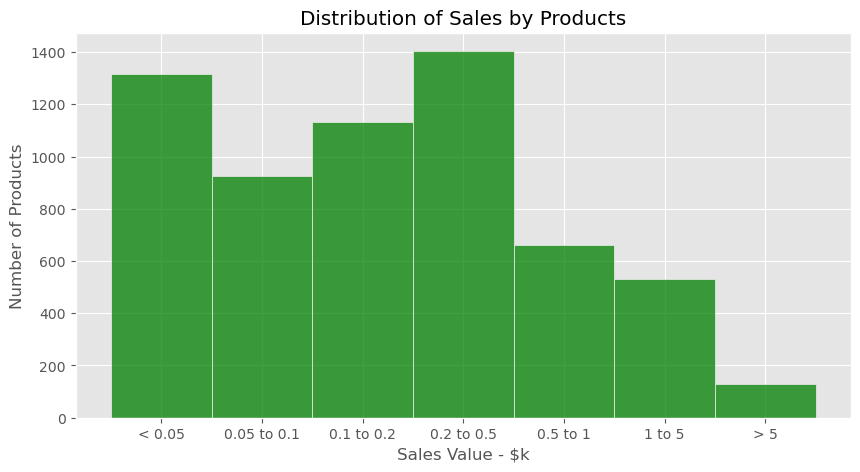

In [47]:
# Examine product sales

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import scipy.stats

# Create customer sales 
cust_sales = pd.merge(customer_reviews_df, customers_df, on='customer_id')
cust_sales = pd.merge(cust_sales, sales_df, on='uniq_id')
cust_sales_stock = pd.merge(cust_sales, stock_df, on='sku', how='left')

# Exclude without a list price
no_sale_price = len(cust_sales_stock[cust_sales_stock['sale_price'] <= 0])
print(f'Sales with no sale price: {no_sale_price}')
cust_sales_stock = cust_sales_stock[cust_sales_stock['sale_price'] > 0]

# Aggregate totals for each product the sales information 
stock_summary = cust_sales_stock[['sku', 'stock_name']].drop_duplicates()

groups = cust_sales_stock.groupby('sku')
stock_summary['sales_count'] = groups['sale_price'].transform('count')
stock_summary['sales_total$k'] = groups['sale_price'].transform('sum')
stock_summary['sales_total$k'] = (stock_summary['sales_total$k'] / 1000).round(4)
stock_summary['sales_price'] = groups['sale_price'].transform('mean')
stock_summary['uniq_cust_count'] = groups['customer_id'].transform('nunique')

# Box plot of the distribution for products
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize =(12, 9))
fig.suptitle('Sales Distribution By Products')

ax0.set_title('Customer Count')
ax1.set_title('Sales Count')
ax2.set_title('Sales Total $k')

box0 = ax0.boxplot(stock_summary['uniq_cust_count'], patch_artist=True)
for patch in box0['boxes']:
    patch.set(facecolor='lightblue')
box1 = ax1.boxplot(stock_summary['sales_count'], patch_artist=True)
for patch in box1['boxes']:
    patch.set(facecolor='lightblue')
box2 = ax2.boxplot(stock_summary['sales_total$k'], patch_artist=True)
for patch in box2['boxes']:
    patch.set(facecolor='lightblue')
plt.show()

# Examine top and bottom 5 products by sales value
top5 = stock_summary.nlargest(5, 'sales_total$k')
bottom5 = stock_summary.nsmallest(5, 'sales_total$k')

print('Top Five Products by Sales Value')
display(top5[['stock_name', 'sales_price', 'uniq_cust_count', 'sales_count', 'sales_total$k']])
print('Bottom Five Products by Sales Value')
display(bottom5[['stock_name', 'sales_price', 'uniq_cust_count', 'sales_count', 'sales_total$k']])

# Sales from top x
x = 100
largestX = stock_summary.nlargest(x, 'sales_total$k')
largestX_value = (largestX['sales_total$k'].sum()).round(2)
total_sales = (stock_summary['sales_total$k'].sum()).round(2)
percentage = ((largestX_value / total_sales) * 100).round(2)
total_products = len(stock_df)
print(f'Total sales value $k: {total_sales}, from top {x}: {largestX_value}, approx {percentage}%')
print(f'Total number of products: {total_products}')

# Visualise the Sales Value ranges
value_bins = [0, 0.05, 0.1, 0.2, 0.5, 1, 5, 500]
value_bins_labels = ['< 0.05', '0.05 to 0.1', '0.1 to 0.2', '0.2 to 0.5', '0.5 to 1', '1 to 5', '> 5']
stock_summary['sales_groups'] = pd.cut(stock_summary['sales_total$k'], bins=value_bins, 
                       labels=value_bins_labels, right=False)

fig, ax = plt.subplots(figsize =(10, 5))
sns.histplot(stock_summary['sales_groups'], bins=value_bins, kde=False, color = 'green')
plt.xticks([0, 1, 2, 3, 4, 5, 6])
plt.title('Distribution of Sales by Products')
plt.xlabel('Sales Value - $k')
plt.ylabel('Number of Products')
plt.show()



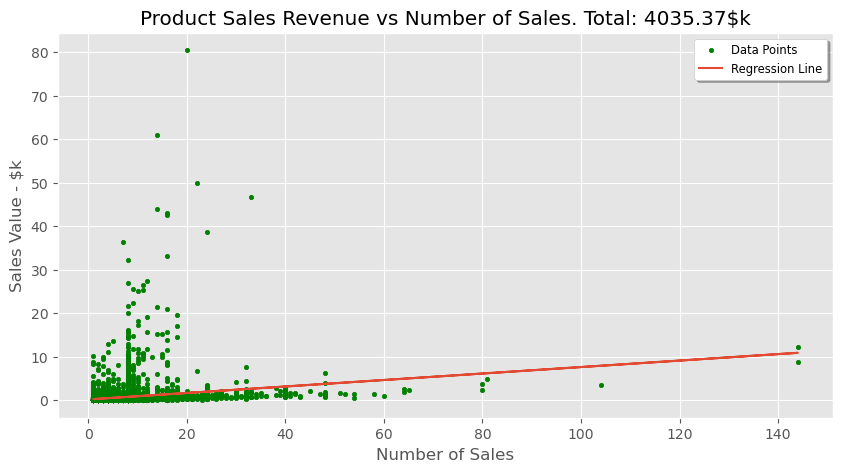

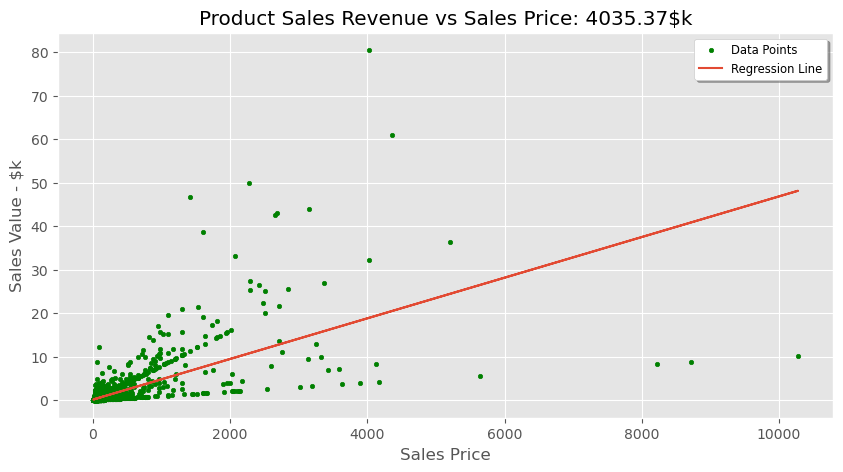

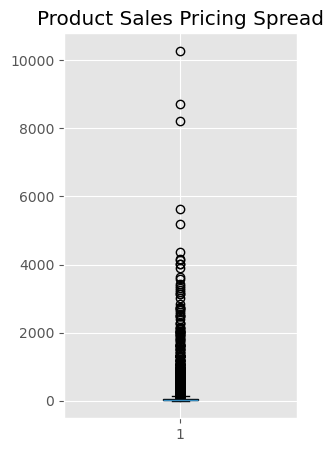

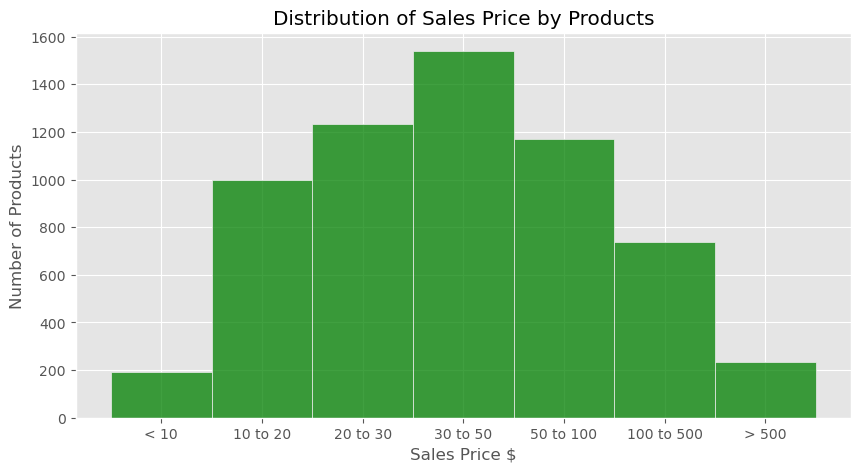

/var/folders/wd/rhzj_w8570g_y66t6j6mh4zw0000gn/T/ipykernel_42491/2152018.py:68: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = stock_summary.groupby('sales_price_bands')
/var/folders/wd/rhzj_w8570g_y66t6j6mh4zw0000gn/T/ipykernel_42491/2152018.py:69: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  bands_summary['sales_total$k'] = groups['sales_total$k'].transform(sum)


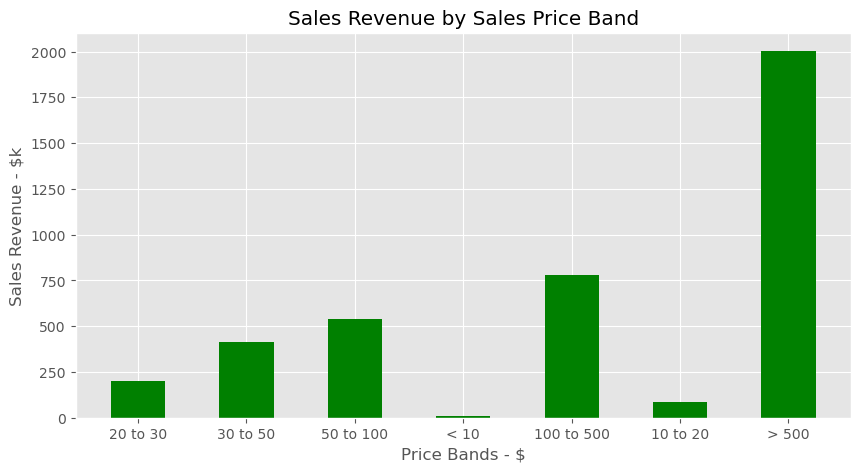

In [ ]:
# Examine Product Pricing

# Identify where high sales value comes from?
# Is it sales volume or pricing

# Compare sales revenue with number of sales
x = stock_summary['sales_count']
y = stock_summary['sales_total$k']

slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
fig, ax = plt.subplots(figsize =(10, 5))

ax.set_title(f'Product Sales Revenue vs Number of Sales. Total: {total_sales}$k')
ax.set_xlabel('Number of Sales')
ax.set_ylabel('Sales Value - $k')
ax.scatter(x, y, label= 'Data Points', color = 'g', s = 10)
ax.plot(x, intercept + slope * x, label='Regression Line')
ax.legend(fontsize='small', loc='upper right', shadow=True, facecolor='white')
plt.show()

# Compare sales revenue with sales price
x = stock_summary['sales_price']
y = stock_summary['sales_total$k']

slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
fig, ax = plt.subplots(figsize =(10, 5))

ax.set_title(f'Product Sales Revenue vs Sales Price: {total_sales}$k')
ax.set_xlabel('Sales Price')
ax.set_ylabel('Sales Value - $k')
ax.scatter(x, y, label= 'Data Points', color = 'g', s = 10)
ax.plot(x, intercept + slope * x, label='Regression Line')
ax.legend(fontsize='small', loc='upper right', shadow=True, facecolor='white')
plt.show()

# Look at the spread of pricing
fig,ax0 = plt.subplots(figsize =(3, 5))
ax0.set_title('Product Sales Pricing Spread')
box0 = ax0.boxplot(stock_summary['sales_price'], patch_artist=True)
for patch in box0['boxes']:
    patch.set(facecolor='lightblue')
plt.show()

# Look at the number of products across price bands
value_bins = [0, 10, 20, 30, 50, 100, 500, 500000]
value_bins_labels = ['< 10', '10 to 20', '20 to 30', '30 to 50', '50 to 100', '100 to 500', '> 500']
stock_summary['sales_price_bands'] = pd.cut(stock_summary['sales_price'], bins=value_bins, 
                       labels=value_bins_labels, right=False)

fig, ax = plt.subplots(figsize =(10, 5))
sns.histplot(stock_summary['sales_price_bands'], bins=value_bins, kde=False, color = 'green')
plt.xticks([0, 1, 2, 3, 4, 5, 6])
plt.title('Distribution of Sales Price by Products')
plt.xlabel('Sales Price $')
plt.ylabel('Number of Products')
plt.show()


# Revenue by price band
bands_summary = stock_summary[['sales_price_bands']].drop_duplicates()
groups = stock_summary.groupby('sales_price_bands')
bands_summary['sales_total$k'] = groups['sales_total$k'].transform(sum)

fig, ax = plt.subplots(figsize =(10, 5))
ax.set_title(f'Sales Revenue by Sales Price Band')
ax.set_xlabel('Price Bands - $')
ax.set_ylabel('Sales Revenue - $k')
bars = ax.bar(bands_summary['sales_price_bands'], bands_summary['sales_total$k'], color='green', width=0.5)
plt.show()
